In [25]:
import pandas as pd
from pathlib import Path
# import matplotlib_venn
import scanpy as sc
import stlearn as st
import anndata as ad
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

In [2]:
# Wiener
BASE_PATH = Path("/scratch/imb/Xiao/")

In [ ]:
# Bunya
BASE_PATH = Path("/scratch/project_mnt/S0010/Xiao")

In [18]:
df_no = pd.DataFrame()
for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_no_norm").rglob("stimage_cor*.csv"):
    # print(file)
    df_no = pd.concat([df_no, pd.read_csv(file, index_col=0)], axis=1)
df_no = df_no.T
df_no["Pearson correlation"] = df_no["Pearson correlation"].astype(float)
df_no["config"] = "without normalization"

In [19]:
# df_norm = pd.DataFrame()
# for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_tile_size_bunya/stimage_tile_size_299").rglob("stimage_cor*.csv"):
#     # print(file)
#     df_norm = pd.concat([df_norm, pd.read_csv(file, index_col=0)], axis=0)
# df_norm["config"] = "with normalization"

In [39]:
df_norm = pd.DataFrame()
for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_tile_size_bunya").rglob("stimage_tile_size_299/stimage_cor*.csv"):
    # print(file)
    df_norm = pd.concat([df_norm, pd.read_csv(file, index_col=0)], axis=1)
df_norm = df_norm.T
df_norm["Pearson correlation"] = df_norm["Pearson correlation"].astype(float)
df_norm["config"] = "With normalization"

In [40]:
df_no

,Gene,Pearson correlation,Slide,Method,Tile_size,config
0,ISG15,-0.127034,FFPE,STimage,no_norm,without normalization
1,TNFRSF18,-0.063729,FFPE,STimage,no_norm,without normalization
2,TNFRSF4,-0.119840,FFPE,STimage,no_norm,without normalization
3,CALML6,-0.063228,FFPE,STimage,no_norm,without normalization
4,HES5,-0.047461,FFPE,STimage,no_norm,without normalization
...,...,...,...,...,...,...
1517,ETS2,0.018423,1160920F,STimage,no_norm,without normalization
1518,MX1,-0.085301,1160920F,STimage,no_norm,without normalization
1519,TMPRSS2,0.045751,1160920F,STimage,no_norm,without normalization
1520,ITGB2,0.046077,1160920F,STimage,no_norm,without normalization


In [41]:
df_norm

,Gene,Pearson correlation,Slide,Method,Tile_size,config
0,ISG15,-0.014104,FFPE,STimage,299,With normalization
1,TNFRSF18,-0.023295,FFPE,STimage,299,With normalization
2,TNFRSF4,-0.131900,FFPE,STimage,299,With normalization
3,CALML6,-0.057468,FFPE,STimage,299,With normalization
4,HES5,-0.032661,FFPE,STimage,299,With normalization
...,...,...,...,...,...,...
1517,ETS2,0.011108,1160920F,STimage,299,With normalization
1518,MX1,-0.054176,1160920F,STimage,299,With normalization
1519,TMPRSS2,-0.046214,1160920F,STimage,299,With normalization
1520,ITGB2,0.060362,1160920F,STimage,299,With normalization


In [42]:
df= pd.concat([df_norm, df_no], axis=0)

In [43]:
# import pickle
# with open("top100gene_tile_size.pickle", "wb") as f:
#     pickle.dump(top_100gene, f)

In [44]:
#read pickle file
with open("top100gene_tile_size.pickle", "rb") as f:
    top_100gene = pickle.load(f)

In [45]:
df_top100 = df[df["Gene"].isin(top_100gene)]

(0.0, 1.0)

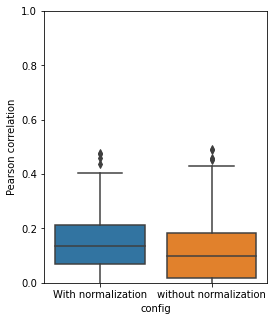

In [48]:
ax, fig = plt.subplots(figsize=(4,5))
sns.boxplot(x="config", y="Pearson correlation", data=df_top100)
plt.ylim(0,1)